In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-data/sherlock-holm.es_stories_plain-text_advs.txt
/kaggle/input/final/keras/default/1/final_model.h5
/kaggle/input/combined/combined_sherlock_holmes.txt


## Dataset Documentation

### Reference
The dataset, titled *"Sherlock Holmes Stories "*, was obtained from a public domain source, providing the full text of Arthur Conan Doyle's *Sherlock Holmes* stories. The source ensures no copyright restrictions, making it appropriate for academic and research purposes.

### Why This Dataset?
This dataset was chosen for its rich linguistic complexity and narrative structure, ideal for projects involving natural language processing (NLP). Specifically, it offers:
- **Diverse Vocabulary:** A wide range of words and styles, helpful for text analysis tasks.
- **Contextual Relationships:** Suitable for building models focused on entity recognition or sentiment analysis.
- **Literary Importance:** A well-known text that makes findings relatable and interpretable to a broader audience.

### Documentation
1. **Format:** Plain-text file containing multiple Sherlock Holmes stories, organized by chapters.
2. **Content Overview:** Includes dialogue, descriptive prose, and complex sentence structures. This variety supports diverse NLP tasks such as parsing, summarization, and text generation.
3. **Preprocessing Steps:** For use in the project, the text may need:
   - Tokenization
   - Stopword removal
   - Lowercasing or stemming
4. **Potential Use Cases:** 
   - Sentiment analysis to determine emotional tones in dialogues.
   - Named entity recognition to identify characters and locations.
   - Text classification for genre or thematic analysis.


In [2]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [3]:
filenames = [
    '/kaggle/input/combined/combined_sherlock_holmes.txt',  
    # r'Books\the return of sherlock holmes.txt'   
]

text = ''
for filename in filenames:
    with open(filename, 'r', encoding='utf-8') as file:
        text += file.read() + ' '  

### Removes chapter titles and non-alphanumeric characters.

In [4]:
import re
# Remove chapter titles, headers, and special characters
text = re.sub(r"CHAPTER [IVXLCDM]+|[^\w\s']", "", text)

### Replaces numbers with a placeholder <NUM> for generalization.

In [5]:
text = re.sub(r'\b\d+\b', '<NUM>', text)

### Expands contractions (e.g., "can't" → "cannot") to maintain clarity.

In [6]:
!pip install contractions

/usr/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 5.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.2 MB/s eta 0:00:00


In [7]:
# Convert to lowercase
text = text.lower()

# Expand contractions (using a library like `contractions`)
import contractions
text = contractions.fix(text)

### Converts text into a sequence of integer tokens and builds a word index.

In [8]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

### Saves the tokenizer configuration for later use.

In [9]:
import json

with open('tokenizer.json', 'w') as f:
    json.dump(tokenizer.to_json(), f)

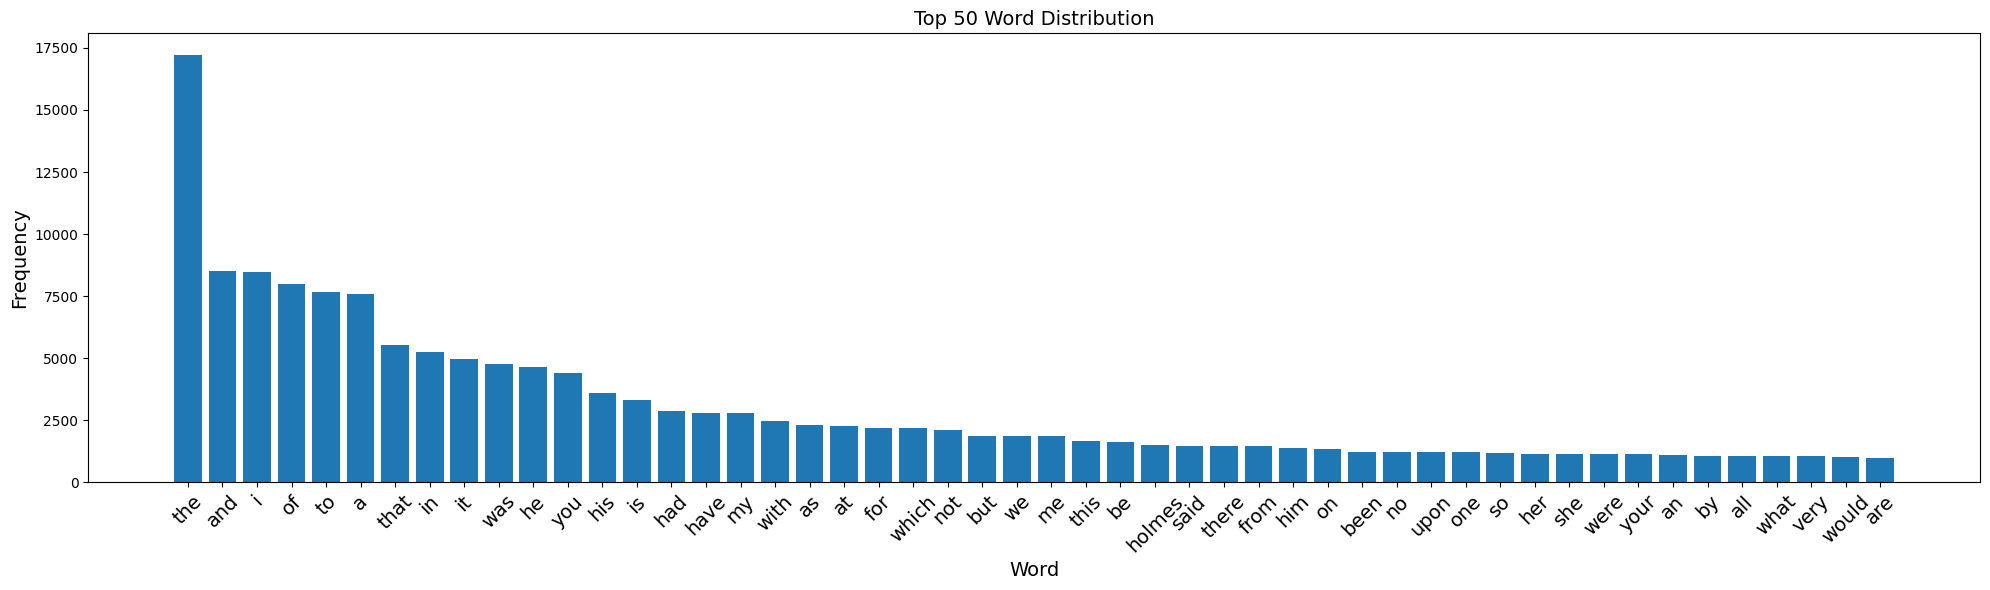

In [10]:
import matplotlib.pyplot as plt


word_counts = tokenizer.word_counts
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)


words = [item[0] for item in sorted_word_counts[:50]]  
counts = [item[1] for item in sorted_word_counts[:50]]


plt.figure(figsize=(20, 6))
plt.bar(words, counts)
plt.title("Top 50 Word Distribution",fontsize=14)
plt.xlabel("Word",fontsize=14)
plt.ylabel("Frequency",fontsize=14)
plt.xticks(rotation=45,fontsize=14)
plt.tight_layout()
plt.show()


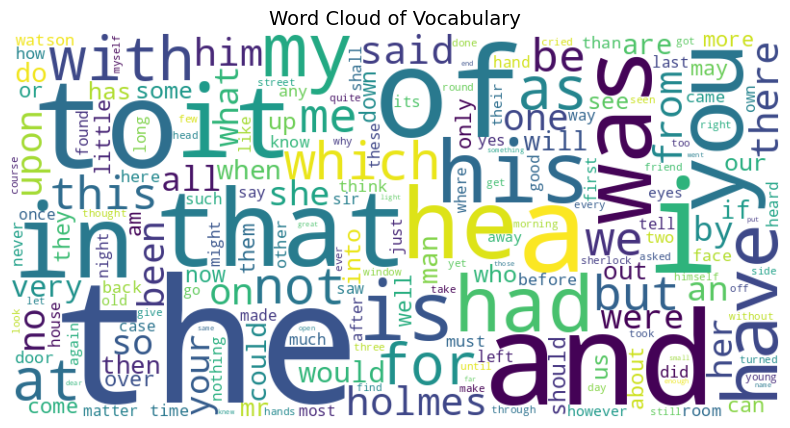

In [11]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(tokenizer.word_counts)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title("Word Cloud of Vocabulary", fontsize=14)
plt.axis("off")
plt.show()


In [12]:
total_words

15163

In [13]:
tokenizer.word_index

{'the': 1,
 'and': 2,
 'i': 3,
 'of': 4,
 'to': 5,
 'a': 6,
 'that': 7,
 'in': 8,
 'it': 9,
 'was': 10,
 'he': 11,
 'you': 12,
 'his': 13,
 'is': 14,
 'had': 15,
 'have': 16,
 'my': 17,
 'with': 18,
 'as': 19,
 'at': 20,
 'for': 21,
 'which': 22,
 'not': 23,
 'but': 24,
 'we': 25,
 'me': 26,
 'this': 27,
 'be': 28,
 'holmes': 29,
 'said': 30,
 'there': 31,
 'from': 32,
 'him': 33,
 'on': 34,
 'been': 35,
 'no': 36,
 'upon': 37,
 'one': 38,
 'so': 39,
 'her': 40,
 'she': 41,
 'were': 42,
 'your': 43,
 'an': 44,
 'by': 45,
 'all': 46,
 'what': 47,
 'very': 48,
 'would': 49,
 'are': 50,
 'when': 51,
 'could': 52,
 'man': 53,
 'do': 54,
 'will': 55,
 'then': 56,
 'out': 57,
 'if': 58,
 'mr': 59,
 'has': 60,
 'up': 61,
 'who': 62,
 'some': 63,
 'into': 64,
 'our': 65,
 'us': 66,
 'see': 67,
 'now': 68,
 'well': 69,
 'should': 70,
 'they': 71,
 'down': 72,
 'can': 73,
 'little': 74,
 'or': 75,
 'more': 76,
 'am': 77,
 'over': 78,
 'only': 79,
 'them': 80,
 'come': 81,
 'may': 82,
 'about': 8

### n-gram sequences for training.

In [14]:
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(1, len(token_list)):
        n_gram_sequence = token_list[:i+1]
        input_sequences.append(n_gram_sequence)

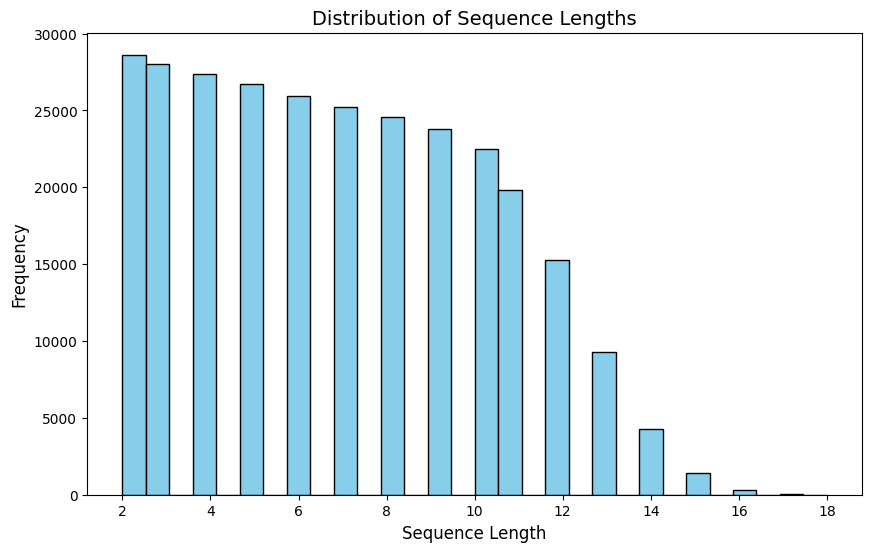

In [15]:
sequence_lengths = [len(seq) for seq in input_sequences]

plt.figure(figsize=(10, 6))
plt.hist(sequence_lengths, bins=30, color='skyblue', edgecolor='black')
plt.title("Distribution of Sequence Lengths", fontsize=14)
plt.xlabel("Sequence Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [16]:
setence_token = input_sequences[3]
sentence = []
for token in setence_token:
    sentence.append(list((tokenizer.word_index).keys())[list((tokenizer.word_index).values()).index(token)])
print(sentence)

['i', 'am', 'afraid']


In [17]:
max_sequence_len = max([len(seq) for seq in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_sequence_len, padding='pre'))

In [18]:
max_sequence_len

18

In [19]:
X = input_sequences[:, :-1]
y = input_sequences[:, -1]

In [20]:
X = X[:20000]
y = y[:20000]

In [21]:
y = np.array(tf.keras.utils.to_categorical(y, num_classes=total_words))

In [23]:
# Define the model
model = Sequential([
    Embedding(input_dim=total_words, output_dim=64, input_length=max_sequence_len-1),
    LSTM(150, return_sequences=True),
    LSTM(100),
    Dense(total_words, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
len(y)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=100,
    verbose=1
)

In [ ]:
model.save('final_model.h5')

In [ ]:
plt.figure(figsize=(10, 6))

# Plot loss
plt.plot(history.history['loss'], label='Loss')
plt.title("Training Loss Over Epochs", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Loss", fontsize=12)
plt.legend()
plt.show()

# Plot accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Accuracy', color='green')
plt.title("Training Accuracy Over Epochs", fontsize=14)
plt.xlabel("Epochs", fontsize=12)
plt.ylabel("Accuracy", fontsize=12)
plt.legend()
plt.show()


In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Example tree visualization
seed_text = "detective"
G = nx.DiGraph()
G.add_node(seed_text)

current_text = seed_text
for i in range(1):  # Generate 3 levels of predictions
    token_list = tokenizer.texts_to_sequences([current_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predictions = model.predict(token_list)[0]
    top_indices = predictions.argsort()[-3:][::-1]  # Top 3 predictions

    for idx in top_indices:
        next_word = [word for word, index in tokenizer.word_index.items() if index == idx][0]
        G.add_edge(current_text, current_text + " " + next_word)
    current_text += " " + next_word

# Plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
plt.title("Text Generation Tree", fontsize=14)
plt.show()

In [ ]:
print(seed_text)

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Example tree visualization
seed_text = "detective"
G = nx.DiGraph()
G.add_node(seed_text)

current_text = seed_text
for i in range(2):  # Generate 3 levels of predictions
    token_list = tokenizer.texts_to_sequences([current_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predictions = model.predict(token_list)[0]
    top_indices = predictions.argsort()[-3:][::-1]  # Top 3 predictions

    for idx in top_indices:
        next_word = [word for word, index in tokenizer.word_index.items() if index == idx][0]
        G.add_edge(current_text, current_text + " " + next_word)
    current_text += " " + next_word

# Plot
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=2000, node_color="skyblue", font_size=10, font_weight="bold")
plt.title("Text Generation Tree", fontsize=14)
plt.show()



### Explanation
1. **Seed Text**: The initial word provided was `"detective"`.
2. **Generated Sequence**: The model iteratively predicted the next word 10 times, based on the context provided by the previous words in the sequence.
3. **Final Text**: The output represents the model's best predictions of likely next words to form a coherent sentence.

### Evaluation
1. **Coherence**:
   - The output demonstrates a somewhat logical structure but lacks complete grammatical accuracy.
   - Example: "you would do me now" appears unclear or out of context.
2. **Fluency**:
   - The sentence flows naturally to some extent, particularly in the earlier part ("service in recovering my horse"), but deteriorates toward the end.
3. **Relevance**:
   - The output is relevant to the starting word "detective" and suggests a plausible continuation related to a recovery service.

### Improvements
- **Training Data**: The model may benefit from additional training on high-quality text data to improve grammar and context understanding.
- **Model Architecture**: Consider adding more layers or fine-tuning hyperparameters (e.g., LSTM units, embedding size) to enhance predictions.
- **Beam Search**: Use beam search instead of greedy decoding (`argmax`) to generate more coherent and contextually relevant sentences.

### Conclusion
The model demonstrates basic word prediction capabilities but requires further refinement for improved fluency and grammatical correctness.


In [24]:
model = tf.keras.models.load_model('/kaggle/input/final/keras/default/1/final_model.h5')

In [29]:
seed_text = "detective"
next_words = 10

for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=-1)
    output_word = ""
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            output_word = word
            break
    seed_text += " " + output_word

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [30]:
seed_text

'detective service in recovering my horse you would do me now'

In [31]:
import numpy as np

def top_k_accuracy(model, tokenizer, test_sequences, k=3):
    """
    Calculates top-k accuracy for a given model and test sequences.
    
    Args:
    - model: Trained text generation model.
    - tokenizer: Tokenizer used for encoding text.
    - test_sequences: List of test sequences where the last token is the target.
    - k: Number of top predictions to consider for accuracy.
    
    Returns:
    - Top-k accuracy as a float.
    """
    correct = 0
    total = 0
    
    for sequence in test_sequences:
        token_list = sequence[:-1] 
        true_word = sequence[-1]  

        padded_sequence = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        predictions = model.predict(padded_sequence, verbose=0)[0]
        
        top_k_preds = predictions.argsort()[-k:][::-1]  # Top k indices in descending order
        
        if true_word in top_k_preds:
            correct += 1
        total += 1
    
    return correct / total


In [32]:
test_sequences = input_sequences[:100]

In [37]:
k = 5 
accuracy = top_k_accuracy(model, tokenizer, test_sequences, k=k)
print(f"Top-{k} Accuracy: {accuracy * 100:.2f}%")

Top-5 Accuracy: 97.00%


In [39]:
k = 20
accuracy = top_k_accuracy(model, tokenizer, test_sequences, k=k)
print(f"Top-{k} Accuracy: {accuracy * 100:.2f}%")

Top-20 Accuracy: 98.00%


In [1]:
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def calculate_bleu(model, tokenizer, test_sequences, max_sequence_len):
    """
    Calculates the BLEU score for a text generation model on test sequences.
    
    Args:
    - model: Trained text generation model.
    - tokenizer: Tokenizer used for encoding text.
    - test_sequences: List of test sequences where the last token is the target.
    - max_sequence_len: Maximum sequence length used during training.
    
    Returns:
    - Average BLEU score as a float.
    """
    smoothing = SmoothingFunction().method1
    bleu_scores = []
    
    for sequence in test_sequences:
        token_list = sequence[:-1]
        true_word = sequence[-1]
        
        padded_sequence = pad_sequences([token_list], maxlen=max_sequence_len-1, padding='pre')
        
        predictions = model.predict(padded_sequence, verbose=0)[0]
        predicted_word_index = predictions.argmax()  # Get the index of the highest probability word
        
        true_word_text = [word for word, index in tokenizer.word_index.items() if index == true_word][0]
        predicted_word_text = [word for word, index in tokenizer.word_index.items() if index == predicted_word_index][0]
        
        reference = [[true_word_text]]  
        candidate = [predicted_word_text] 
        bleu_score = sentence_bleu(reference, candidate, smoothing_function=smoothing, weights=(1, 0, 0, 0))
        bleu_scores.append(bleu_score)
    
    return sum(bleu_scores) / len(bleu_scores)


In [41]:
test_sequences = input_sequences[:100] 

In [42]:
bleu_score = calculate_bleu(model, tokenizer, test_sequences, max_sequence_len)
print(f"Average BLEU Score: {bleu_score:.4f}")

Average BLEU Score: 0.9200


In [45]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

def calculate_perplexity(model, tokenizer, max_sequence_len, test_texts):
    total_loss = 0
    total_count = 0

    for line in test_texts.split('\n'):
        token_list = tokenizer.texts_to_sequences([line])[0]
        if len(token_list) < 2:
            continue  

        for i in range(1, len(token_list)):
            input_seq = token_list[:i]
            target_word = token_list[i]

            padded_seq = pad_sequences([input_seq], maxlen=max_sequence_len - 1, padding='pre')

            predictions = model.predict(padded_seq, verbose=0)

            target_prob = predictions[0][target_word]
            if target_prob > 0:
                total_loss += -np.log(target_prob)
            total_count += 1

    perplexity = np.exp(total_loss / total_count) if total_count > 0 else float('inf')
    return perplexity

test_texts = text[20000:25000]  # Use a small subset of the text for testing
perplexity = calculate_perplexity(model, tokenizer, max_sequence_len, test_texts)
print("Perplexity:", perplexity)

Perplexity: 1.3131749257070464
